# Gambaran Umum :

## Tujuan :

    1. Mencari tahu production movie yang mampu menghasilkan film berkualitas. ( Sendiri dan Kelompok )
    2. Daftar Film yang berkualitas.
    3. Genre Film yang sering ditemukan dari film" yang dibuat oleh production film yang berkualitas. ( Sendiri dan Kelompok )
    4. Mencari tahu informasi perbedaan production film sendiri dan kelompok.
    5. Membuat visualisasi yang memudahkan dalam memahami 4 point diatas.
    
## Masalah Umum :

    1. Data terpecah ke dalam 2 file CSV yang berbeda ( Perlu di merge ).
    2. Mencari tolak ukur untuk menyatakan suatu film berkualitas.
    3. Data tersimpan dalam strutkur yang perlu dikelola agar bisa diakses dan ditata ulang dengan baik agar bisa dikelola.
    4. Skala antara dua nilai yang ingin divisualisasikan sangat jauh berbeda. [A = 1000 ; B = 0.1]
    5. Terdapat data yang mengganggu. [Ada film yang dirating bagus, tapi dirating 10 orang saja]
    6. Menentukan nilai minimal untuk menghilangkan data pengganggu
    7. Menentukan nilai minimal suatu film / production movie dikatakan berkualitas

In [132]:
import pandas as pd 
import numpy as np 

# Tranformasi tipe data
from ast import literal_eval

# Untuk Normalisasi nilai  denga skala 0-1
from sklearn.preprocessing import MinMaxScaler


# Visualisasi
import seaborn as sns

# Load Data - Membaca Semua File CSV

In [228]:
# Baca Data CSV nya
credit_movie=pd.read_csv('tmdb_5000_credits.csv')
movie=pd.read_csv('tmdb_5000_movies.csv')

# Menggabungkan Data - Merge File Credit dan Movie

In [227]:
# Data Credit [Kolom]
credit_movie.columns

Index(['<!DOCTYPE html><html><head><meta name="google" content="notranslate"><meta http-equiv="X-UA-Compatible" content="IE=edge;"><style nonce="dnYC10wDWGSbcuNJavyJ_Q">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name="referrer" content="origin"><title>tm

In [135]:
# Data Movie [Kolom]
movie.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [136]:
# Merge Data melalui 'id' dengan 'movie_id'
movie_full_data= movie.merge(credit_movie,left_on='id', right_on='movie_id')

# Pengecekan Data

In [137]:
# Cek apakah ada data yang duplikasi
movie_full_data.duplicated().sum()

0

In [138]:
# Check apakah ada data yang NaN (Ternyata ada, tapi data tersebut memang tidak dibutuhkan unutk analisa)
movie_full_data.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [139]:
# Lihat struktur kolomnya
movie_full_data.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


# Tranformasi Data - Ubah Data String of Dict menjadi Dict 
[ keywords, cast, crew , production_companies, spoken_languages ]

In [140]:
# Menggunakan literal_eval
list_calon_dict = ['keywords','cast','crew','production_companies','spoken_languages','genres']

for calon_dict in list_calon_dict:
    movie_full_data[calon_dict] = movie_full_data[calon_dict].apply(literal_eval)

## Pembobotan IMDB 

Weighted Rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

Keterangan :

    R = Rata-rata votes

    v = Jumlah votes setiap movie

    m = Jumlah minimal pemilih agar suatu movie bisa diperhitungkan

    C = Rata-rata rating yang diberikan ke semua movie

In [141]:
# Berapa rata-rata rating yang diberikan
C= movie_full_data['vote_average'].mean()
C

6.092171559442016

# Cleaning 

Cleaning pada tahap ini, memiliki arti membuang data yang membuat kualitas analisa menjadi buruk

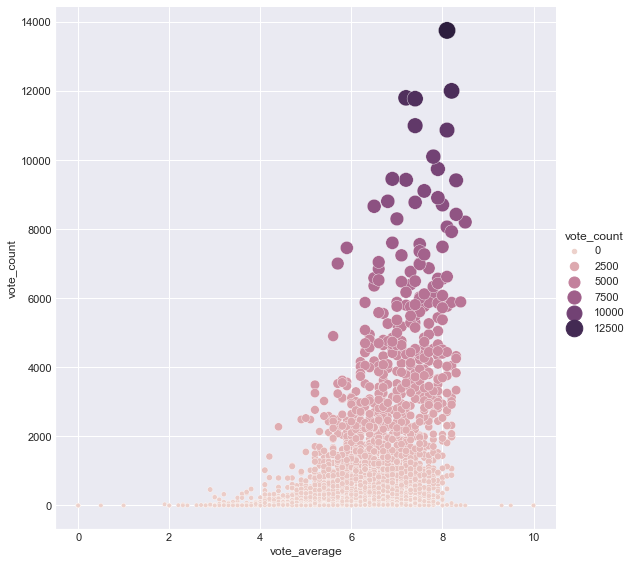

In [142]:
sns.relplot(x="vote_average", y="vote_count",
            size="vote_count", hue="vote_count",
            height=8,
            data=movie_full_data[['vote_average',"vote_count"]],
            sizes=(20, 300));

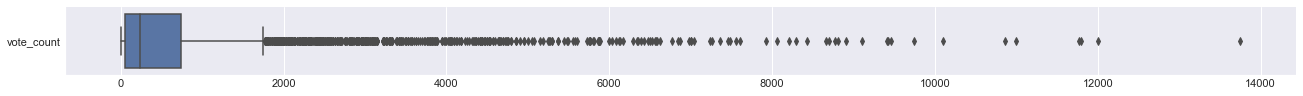

In [143]:
# Melihat median, outer , Percentile
g = sns.catplot( orient="h", height=1.5, aspect=100.7/8.27, kind="box",
                data=movie_full_data[['vote_count']])

In [144]:
# Melihat jumlah outer / outlier
Q1 = movie_full_data['vote_count'].quantile(0.25)
Q3 = movie_full_data['vote_count'].quantile(0.75)
IQR = Q3 - Q1
print("Batas Outer Atas : ",Q3+ 1.5*IQR)
lower_outer = movie_full_data.query('(@Q1 - 1.5 * @IQR) >= vote_count')
upper_outer = movie_full_data.query('vote_count >= (@Q3 + 1.5 * @IQR)')
print(lower_outer.shape)
print(upper_outer.shape)
# Terdapat 504 data yang outlier

Batas Outer Atas :  1761.5
(0, 24)
(504, 24)


In [145]:
# Diawal Terdapat 4803 Film
movie_full_data.shape

(4803, 24)

## Jika kita menentukan jumlah minimal vote = 1761

Maka data yang dimiliki hanya terdapat 504. Menurut saya ini terlalu sedikit, maka dari 2 visualisasi yang ada, disimpulkan diambil persentil 40% agar jumlah data yang dianalisa tidak berkurang banyak

In [146]:
# Mencari jumlah minimal suatu movie bisa dijadikan proses pembelajaran 
# Dibuat 0.4 agar tidak terlalu banyak film yang hilang karena syarat jumlah minimal voters
m= movie_full_data['vote_count'].quantile(0.4)
m

139.0

In [147]:
# Filterisasi ini menyisakan 2888 Data
movie_full_data_filtered = movie_full_data.copy().loc[movie_full_data['vote_count'] >= m]
movie_full_data_filtered.shape

(2888, 24)

### Implementasi rumus IMDB

In [148]:
# Rumus pembobotan rating dari IMDB
def rating_imdb(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [149]:
# Aplikasikan rumusnya
movie_full_data_filtered['score_via_imdb'] = movie_full_data_filtered.apply(rating_imdb, axis=1)
movie_full_data['score_via_imdb'] = movie_full_data.apply(rating_imdb, axis=1)

In [150]:
# Sudah ada hasil rumusnya di kolom baru
movie_full_data_filtered.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,score_via_imdb
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",7.187102
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",6.875795
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",6.293727


## Analisa Skore IMDB vs Vote_avarage vs Popularitas

Pada tahap ini, akan dilakukan analisa mengenai perbedaan dari setiap tolak ukur yang telah dimiliki. Hasil analisa akan dipakai sebagai tolak ukur berikutnya dalam menentukan kualitas suatu film, production movie, dan genre

In [151]:
sorted_via_imdb = movie_full_data_filtered[['vote_average','popularity','score_via_imdb','original_title']].sort_values('score_via_imdb',ascending=False)

In [152]:
sorted_popularity = movie_full_data_filtered[['vote_average','popularity','score_via_imdb','original_title']].sort_values('popularity',ascending=False)

In [153]:
sorted_avg_rate = movie_full_data_filtered[['vote_average','popularity','score_via_imdb','original_title']].sort_values('vote_average',ascending=False)

In [154]:
sorted_via_imdb_non_filtered = movie_full_data[['vote_average','popularity','score_via_imdb','original_title']].sort_values('score_via_imdb',ascending=False)

In [155]:
sns.set(rc={"figure.figsize":(8, 9)})

<AxesSubplot:xlabel='popularity', ylabel='original_title'>

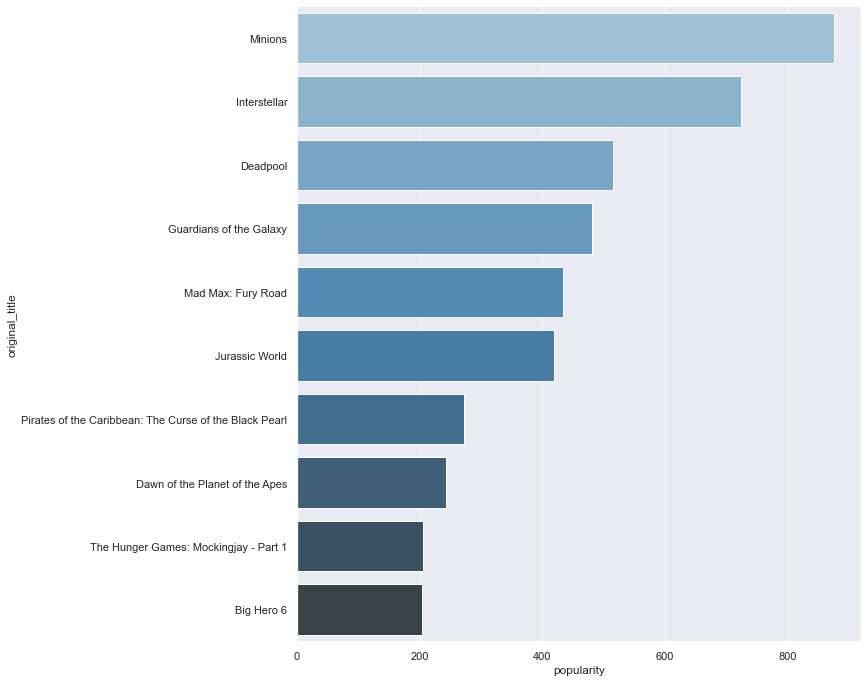

In [156]:
sns.barplot(data = sorted_popularity[['original_title','popularity']].head(10)
            , x="popularity",y="original_title",palette="Blues_d")

<AxesSubplot:xlabel='score_via_imdb', ylabel='original_title'>

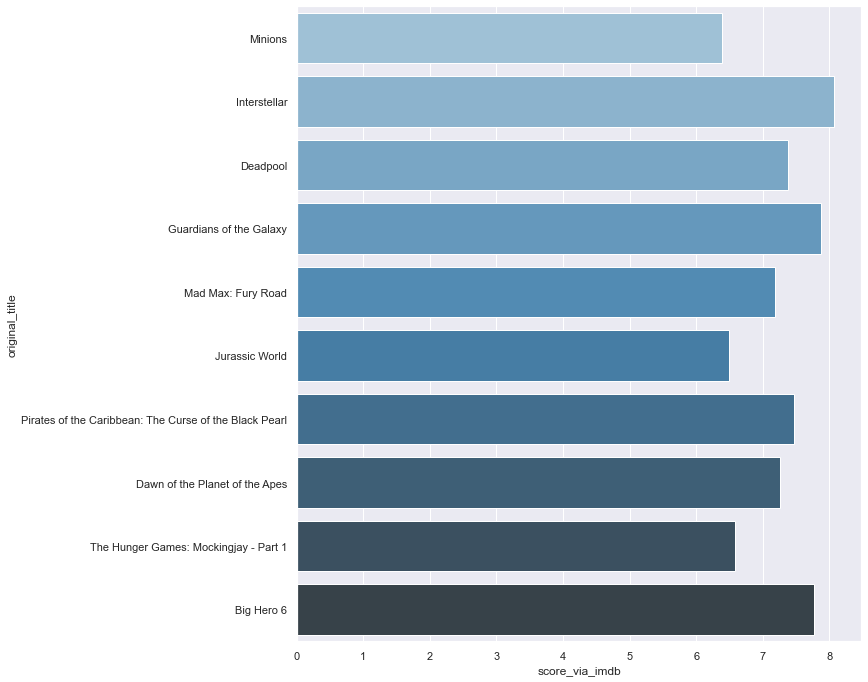

In [157]:
sns.barplot(data = sorted_popularity[['original_title','score_via_imdb']].head(10)
            , x="score_via_imdb",y="original_title",palette="Blues_d")

<AxesSubplot:xlabel='vote_average', ylabel='original_title'>

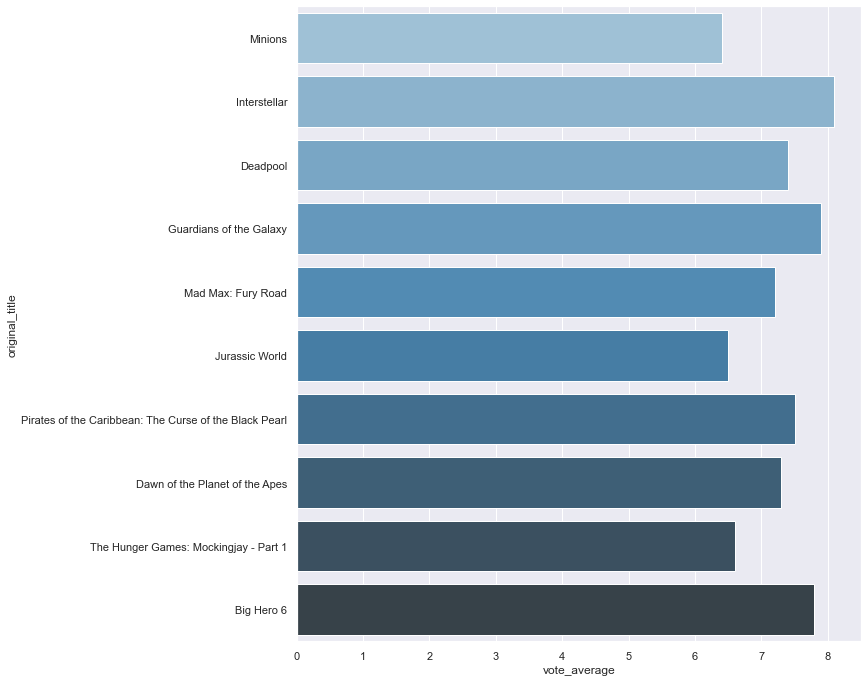

In [158]:
sns.barplot(data = sorted_popularity[['original_title','vote_average']].head(10)
            , x="vote_average",y="original_title",palette="Blues_d")

## Barplot Vote Avarage vs IMDB karena mirip

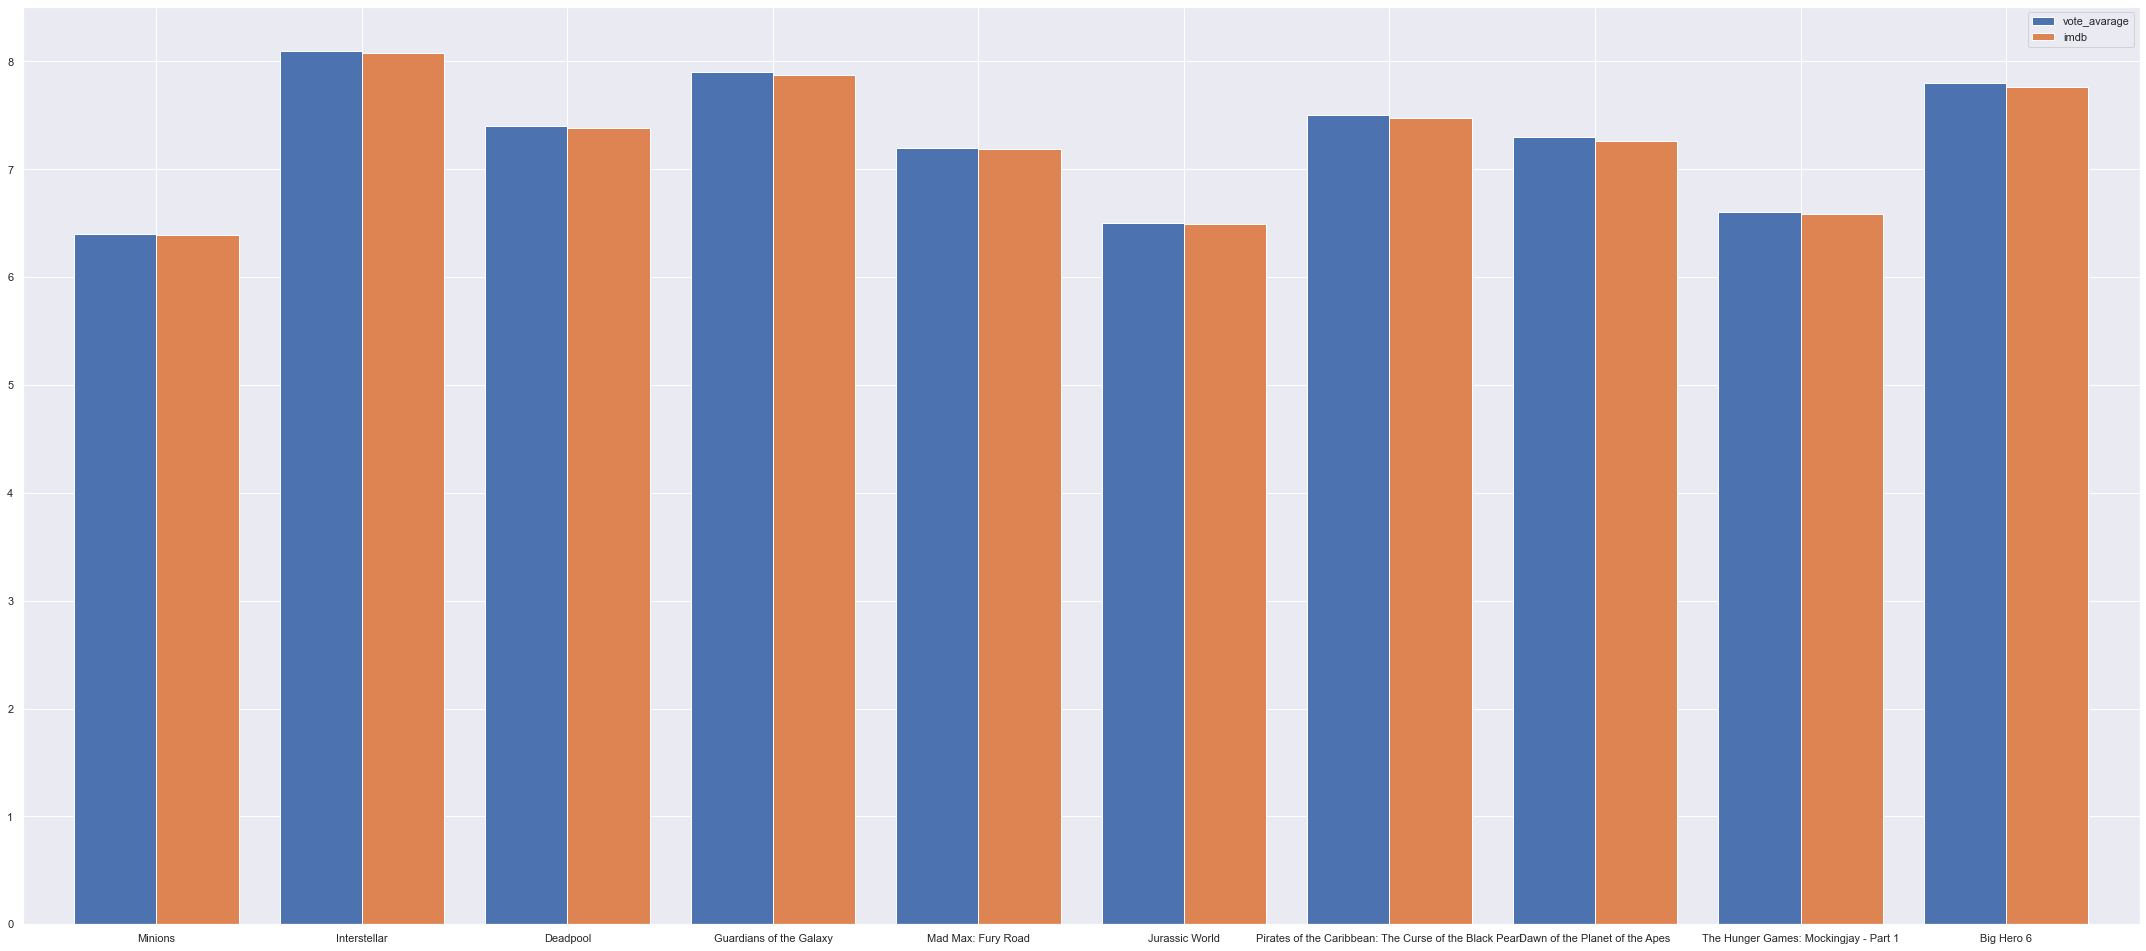

In [159]:
import matplotlib.pyplot as plot


vote_avarage = sorted_popularity['vote_average'].head(10).values
imdb = sorted_popularity['score_via_imdb'].head(10).values
title = sorted_popularity['original_title'].head(10).values
df_vote_avarage_vs_imdb = pd.DataFrame({'vote_avarage': vote_avarage,
                   'imdb': imdb}, index=title)
ax = df_vote_avarage_vs_imdb.plot.bar(rot=0, width=0.8, figsize=(30,13))


### Hasil visualisasi " barplot " 10 film terpopuler

Film yang sangat populer tidak memiliki nilai IMBD yang juga baik dan avg_rate yang baik. ( kita coba lihat visualisasi untuk semua film-nya).

Apakah Avg_rate dan Nilai IMDB sangat berbeda jauh ??

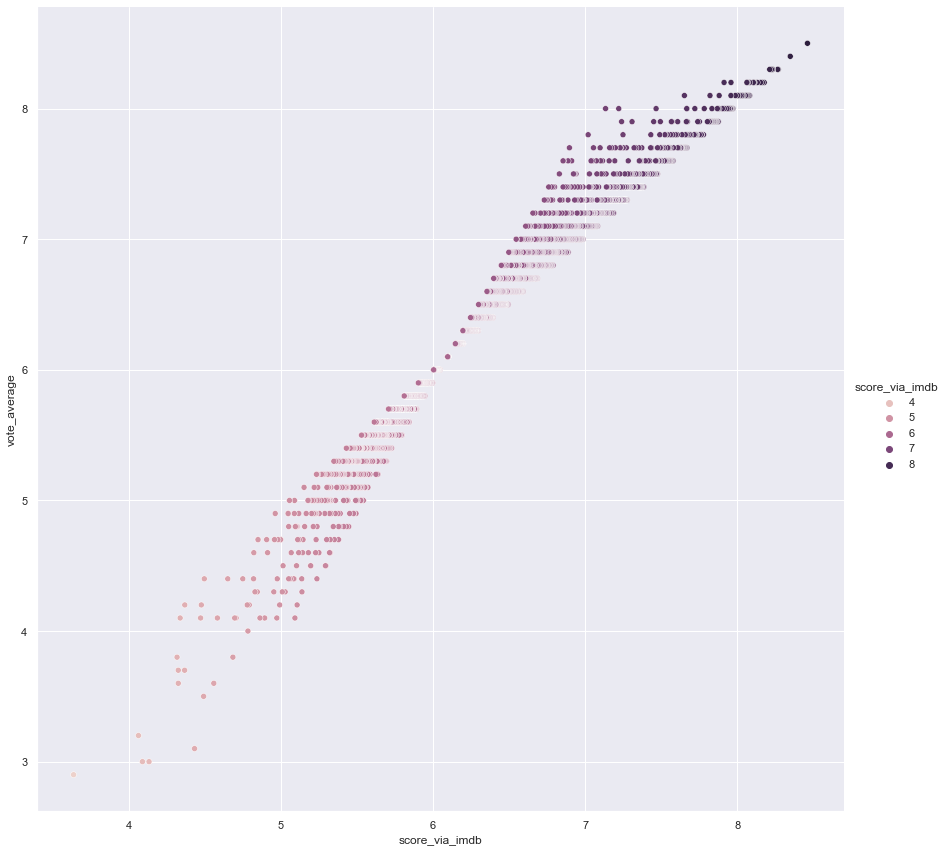

In [160]:
# Melihat apakah rating tinggi sesuai dengan nilai IMDB
sns.relplot(data= sorted_via_imdb[['vote_average','score_via_imdb']],
            x="score_via_imdb", y="vote_average",
            hue = 'score_via_imdb', height=12)


## Filterisasi Persentile 40% diawal membuat data menjadi lebih teratur

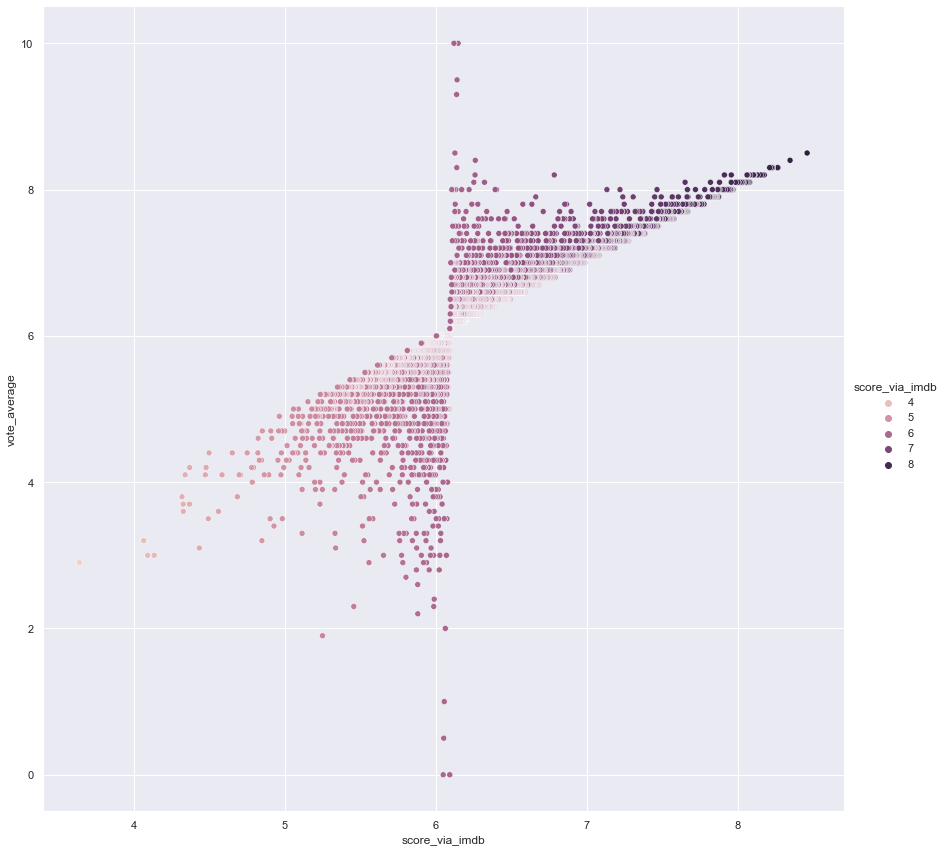

In [161]:
# Visualisasi data yang tidak dilakukan filterisasi
sns.relplot(data= sorted_via_imdb_non_filtered[['vote_average','score_via_imdb']],
            x="score_via_imdb", y="vote_average",
            hue = 'score_via_imdb', height=12)


### Hasil visualisasi "relpot" vote_rate vs IMDB

Diketahui film dengan avg_rate sangat tinggi belum tentu memiliki nilai IMDB yang tinggi. Selain itu, film dengan avg_rate sangat rendah belum tentu berarti film tersebut sangat jelek. 

Disimpulkan, film yang avg_rate kecil, belum tentu sangat jelek. Dan film dengan avg_tinggi belum tentu sangat bagus

## Reclase Nilai popularity dan score_imdb untuk dikomparasi

Rescale dilakukan karena keduanya memiliki nilai yang saling berjauhan untuk di visualisasikan

In [162]:
# Rescale popularitas ke 0-1
scaler_popularity = MinMaxScaler()
scaler_imdb = MinMaxScaler()

scaler_popularity.fit(movie_full_data_filtered[['popularity']])
scaler_imdb.fit(movie_full_data_filtered[['score_via_imdb']])

MinMaxScaler()

In [163]:
# Buat kolom baru untuk menampung hasil rescale
movie_full_data_filtered['popularity_scaled'] = movie_full_data_filtered['popularity'].copy()
movie_full_data_filtered['score_via_imdb_scaled'] = movie_full_data_filtered['score_via_imdb'].copy()

In [164]:
# Lakukan Rescale
movie_full_data_filtered['popularity_scaled'] = scaler_popularity.transform(movie_full_data_filtered[['popularity_scaled']])
movie_full_data_filtered['score_via_imdb_scaled'] = scaler_imdb.transform(movie_full_data_filtered[['score_via_imdb_scaled']])

C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- popularity_scaled
Feature names seen at fit time, yet now missing:
- popularity

  warnings.warn(message, FutureWarning)
C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- score_via_imdb_scaled
Feature names seen at fit time, yet now missing:
- score_via_imdb

  warnings.warn(message, FutureWarning)


In [165]:
# Kita lihat sedikit hasil datanya
movie_full_data_filtered[['popularity','popularity_scaled','score_via_imdb_scaled']].sort_values('popularity_scaled',ascending=False).head(4)

,popularity,popularity_scaled,score_via_imdb_scaled
546,875.581305,1.000000,0.570895
95,724.247784,0.826956,0.920100
788,514.569956,0.587199,0.776793
94,481.098624,0.548926,0.878605


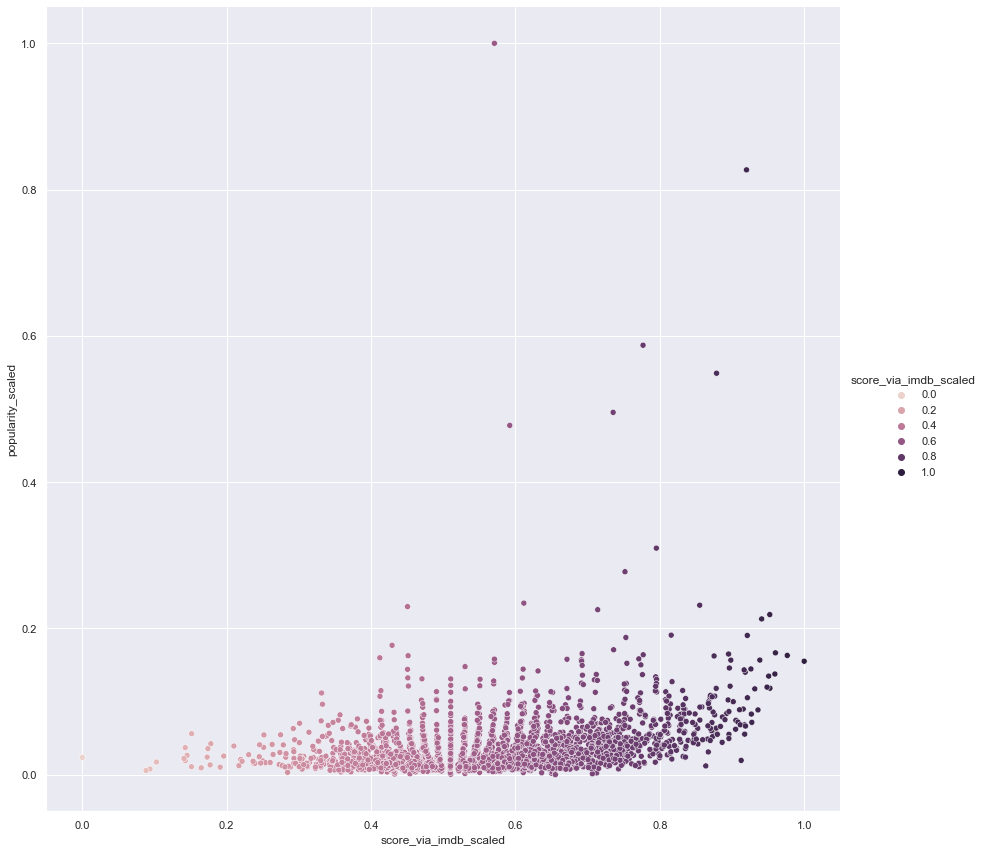

In [166]:
# Melihat apakah populer tinggi sesuai dengan nilai IMDB
sns.relplot(data= movie_full_data_filtered[['popularity_scaled','score_via_imdb_scaled']],
            x="score_via_imdb_scaled", y="popularity_scaled",
            hue = 'score_via_imdb_scaled', height=12)


### Hasil visualisasi "replot" popularity vs  IMDB

Diketahui film dengan popularity tinggi belum tentu memiliki IMDB yang tinggi. Hal ini berlaku sebaliknya

bahwa film dengan popularity rendah bisa jadi memiliki IMDB yang tinggi.

# Digunakan nilai IMDB sebagai acuan untuk menentukan apakah suatu film bagus

In [167]:
top10_movie = movie_full_data_filtered[['original_title','score_via_imdb']].sort_values('score_via_imdb',ascending=False).head(10)

In [168]:
top10_movie

,original_title,score_via_imdb
1881,The Shawshank Redemption,8.459889
3337,The Godfather,8.346819
662,Fight Club,8.267872
3232,Pulp Fiction,8.264178
1818,Schindler's List,8.231314
3865,Whiplash,8.230142
2294,千と千尋の神隠し,8.222873
2731,The Godfather: Part II,8.211738
65,The Dark Knight,8.175868
809,Forrest Gump,8.163676


<AxesSubplot:xlabel='score_via_imdb', ylabel='original_title'>

C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21315 (\N{CJK UNIFIED IDEOGRAPH-5343}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23563 (\N{CJK UNIFIED IDEOGRAPH-5C0B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31070 (\N{CJK UNIFIED ID

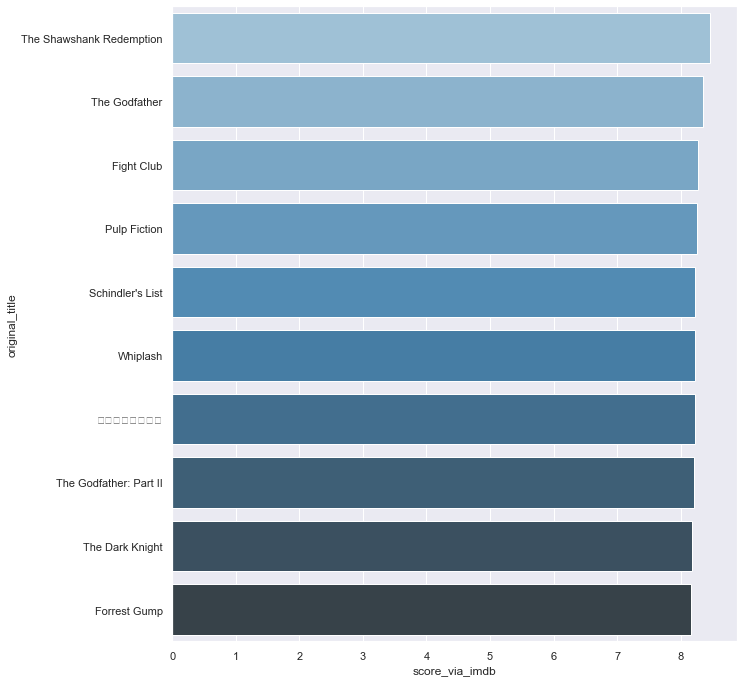

In [169]:
sns.barplot(data = top10_movie
            , x="score_via_imdb",y="original_title",palette="Blues_d")

# Oleh karena itu, kualitas production film akan dilihat dari rata-rata point IMDB yang dikumpulkan

## Mendapatkan production Film Sendiri yang berkualitas

In [170]:
# Sorting DESC data menggunakan acuan IMDB
sorted_via_imdb = movie_full_data_filtered.sort_values('score_via_imdb',ascending=False)
sorted_via_imdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,score_via_imdb,popularity_scaled,score_via_imdb_scaled
1881,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",...,The Shawshank Redemption,8.5,8205,278,The Shawshank Redemption,"[{'cast_id': 3, 'character': 'Andy Dufresne', ...","[{'credit_id': '52fe4231c3a36847f800b153', 'de...",8.459889,0.155175,1.000000
3337,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,"[{'id': 131, 'name': 'italy'}, {'id': 699, 'na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,The Godfather,8.4,5893,238,The Godfather,"[{'cast_id': 5, 'character': 'Don Vito Corleon...","[{'credit_id': '52fe422bc3a36847f80093c9', 'de...",8.346819,0.163078,0.976549


In [171]:
# Bentuk Data Production Movie
sorted_via_imdb.production_companies.head(2).values[1]

[{'name': 'Paramount Pictures', 'id': 4},
 {'name': 'Alfran Productions', 'id': 10211}]

In [172]:
# Mendaftarkan semua production movie , total nilai IMDB dan jumlah movie baik/buruk serta index movie" nya
list_production_companys={}
list_index_data_movie = sorted_via_imdb.index.to_list()
for counter,companies in enumerate(sorted_via_imdb.production_companies):
    if len(companies)==0:
        continue
    elif len(companies)==1:
        if companies[0]['name'] not in list_production_companys:
            if sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]>=0.7:
                list_production_companys[companies[0]['name']]=\
                [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,1,0,[list_index_data_movie[counter]],[]]
            elif sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]<=0.4:
                list_production_companys[companies[0]['name']]=\
                [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,0,1,[],[]]
            else:
                list_production_companys[companies[0]['name']]=\
                [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,0,0,[],[]]
        else:
            if sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]>=0.7:
                list_production_companys[companies[0]['name']]=\
                [list_production_companys[companies[0]['name']][0]+sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],\
                int(list_production_companys[companies[0]['name']][1])+1,int(list_production_companys[companies[0]['name']][2])+1,int(list_production_companys[companies[0]['name']][3]),\
                (list_production_companys[companies[0]['name']][4]),(list_production_companys[companies[0]['name']][5])]
                list_production_companys[companies[0]['name']][4].append(list_index_data_movie[counter])
            elif sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]<=0.4:
                list_production_companys[companies[0]['name']]=\
                [list_production_companys[companies[0]['name']][0]+sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],\
                int(list_production_companys[companies[0]['name']][1])+1,int(list_production_companys[companies[0]['name']][2]),int(list_production_companys[companies[0]['name']][3])+1,\
                (list_production_companys[companies[0]['name']][4]),(list_production_companys[companies[0]['name']][5])]
                list_production_companys[companies[0]['name']][5].append(list_index_data_movie[counter])
            else:
                list_production_companys[companies[0]['name']]=\
                [list_production_companys[companies[0]['name']][0]+sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],\
                int(list_production_companys[companies[0]['name']][1])+1,int(list_production_companys[companies[0]['name']][2]),int(list_production_companys[companies[0]['name']][3]),\
                (list_production_companys[companies[0]['name']][4]),(list_production_companys[companies[0]['name']][5])]
    else:
        for companie in companies:
            if companie['name'] not in list_production_companys:
                if sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]>=0.7:
                    list_production_companys[companie['name']]=\
                    [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,1,0,[list_index_data_movie[counter]],[]]
                elif sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]<=0.4:
                    list_production_companys[companie['name']]=\
                    [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,0,1,[],[]]
                else:
                    list_production_companys[companie['name']]=\
                    [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,0,0,[],[]]
            else:
                list_production_companys[companie['name']]=\
                [list_production_companys[companie['name']][0]+sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],\
                int(list_production_companys[companie['name']][1])+1,int(list_production_companys[companie['name']][2]),int(list_production_companys[companie['name']][3]),\
                (list_production_companys[companie['name']][4]),(list_production_companys[companie['name']][5])]

In [173]:
# Transformation dictionary menjadi pandas
pd_list_production_companys = pd.DataFrame.from_dict(list_production_companys, orient='index',columns=['sum_imdb', 'total_movie','total_quality_movie','total_bad_movie','index_quality_movie','index_bad_movie'])

In [174]:
# Penambahan kolom mean_imdb
pd_list_production_companys['mean_imdb'] = pd_list_production_companys['sum_imdb']/pd_list_production_companys['total_movie']

In [175]:
# Penambahan kolom jenis production
pd_list_production_companys['jenis_production'] = "Sendirian"

In [176]:
# Didapati 10 production film dengan total nilai imdb terbaik
pd_list_production_companys.sort_values("sum_imdb" , ascending=False).head(10)

,sum_imdb,total_movie,total_quality_movie,total_bad_movie,index_quality_movie,index_bad_movie,mean_imdb,jenis_production
Warner Bros.,157.238677,271,5,3,"[65, 4329, 2328, 1103, 2404]","[1334, 3111, 1035]",0.580217,Sendirian
Universal Pictures,143.370579,255,5,3,"[1818, 1850, 4076, 3526, 1753]","[1130, 4011, 2003]",0.562238,Sendirian
Paramount Pictures,125.495133,221,8,0,"[3337, 809, 1828, 2946, 2917, 2815, 3931, 867]",[],0.567851,Sendirian
Twentieth Century Fox Film Corporation,98.211233,178,2,2,"[1990, 2108]","[966, 376]",0.551748,Sendirian
Columbia Pictures,89.384721,166,5,0,"[287, 818, 2659, 4216, 2184]",[],0.538462,Sendirian
New Line Cinema,71.694815,133,3,4,"[3057, 1559, 1581]","[3566, 1238, 1484, 1621]",0.539059,Sendirian
Walt Disney Pictures,55.271903,96,3,2,"[77, 1695, 4050]","[2559, 2095]",0.575749,Sendirian
Relativity Media,51.377351,99,2,1,"[824, 1816]",[3051],0.518963,Sendirian
Touchstone Pictures,47.849430,83,4,1,"[2453, 1710, 3023, 2368]",[2766],0.576499,Sendirian
DreamWorks SKG,43.197070,73,1,0,[274],[],0.591741,Sendirian


### Daftar Production Movie sendirian yang bagus

In [177]:
# Telah didapati beberapa production film yang cukup berpengalaman dengan mean_imdb yang tertinggi
list_top_production_sendiri = pd_list_production_companys.loc[(pd_list_production_companys['total_movie']>50) & (pd_list_production_companys['mean_imdb']>=0.5)].sort_values("mean_imdb" , ascending=False)
list_top_production_sendiri

,sum_imdb,total_movie,total_quality_movie,total_bad_movie,index_quality_movie,index_bad_movie,mean_imdb,jenis_production
United Artists,32.828575,51,4,0,"[3719, 3739, 2344, 4333]",[],0.643698,Sendirian
Miramax Films,37.878722,61,2,1,"[3232, 2822]",[3595],0.620963,Sendirian
DreamWorks SKG,43.197070,73,1,0,[274],[],0.591741,Sendirian
Canal+,30.819386,53,1,0,[1405],[],0.581498,Sendirian
Warner Bros.,157.238677,271,5,3,"[65, 4329, 2328, 1103, 2404]","[1334, 3111, 1035]",0.580217,Sendirian
Touchstone Pictures,47.849430,83,4,1,"[2453, 1710, 3023, 2368]",[2766],0.576499,Sendirian
Walt Disney Pictures,55.271903,96,3,2,"[77, 1695, 4050]","[2559, 2095]",0.575749,Sendirian
Paramount Pictures,125.495133,221,8,0,"[3337, 809, 1828, 2946, 2917, 2815, 3931, 867]",[],0.567851,Sendirian
Universal Pictures,143.370579,255,5,3,"[1818, 1850, 4076, 3526, 1753]","[1130, 4011, 2003]",0.562238,Sendirian
Twentieth Century Fox Film Corporation,98.211233,178,2,2,"[1990, 2108]","[966, 376]",0.551748,Sendirian


<AxesSubplot:xlabel='mean_imdb'>

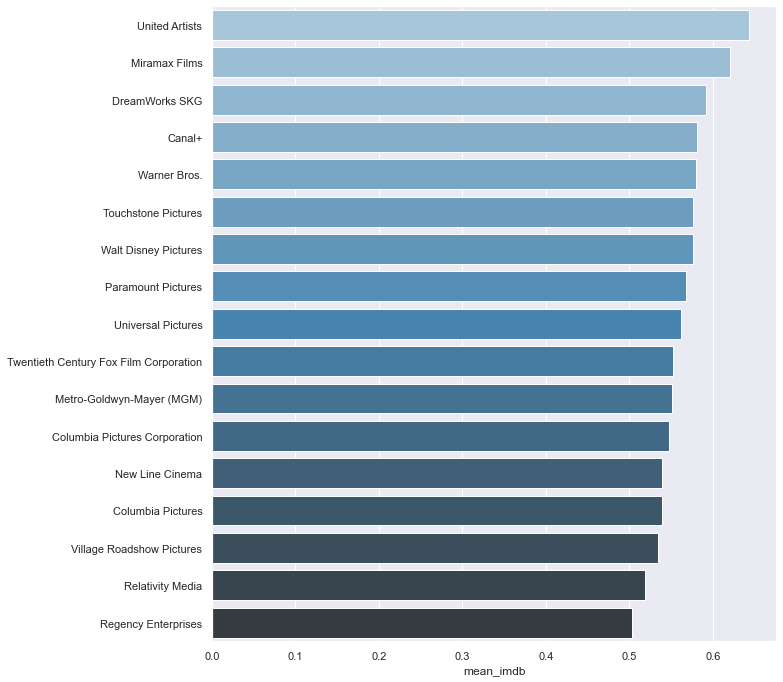

In [178]:
sns.barplot(data = list_top_production_sendiri
            , x="mean_imdb",y=list_top_production_sendiri.index,palette="Blues_d") 

## Mencari acuan suatu production film bisa dikatakan bagus 

Klasifikasikan manual berdasarkan imdb dan total movie yang pernah dibuat

In [179]:
# pd_list_production_companys.drop('kualitas_production',axis=1)
pd_list_production_companys.loc[(pd_list_production_companys['mean_imdb']>=0.5) &\
                                (pd_list_production_companys['total_movie']>=50),'kualitas_production'] = "Baik - Sangat Berpengalaman" 

pd_list_production_companys.drop('kualitas_production',axis=1)
pd_list_production_companys.loc[(pd_list_production_companys['mean_imdb']>=0.5) &\
                                (pd_list_production_companys['total_movie']<50) &\
                                (pd_list_production_companys['total_movie']>25),'kualitas_production'] = "Baik - Berpengalaman" 


pd_list_production_companys.loc[(pd_list_production_companys['mean_imdb']<0.5) &\
                                (pd_list_production_companys['mean_imdb']>=0.4) &
                                (pd_list_production_companys['total_movie']>25),'kualitas_production'] = "Sedang - Berpengalaman" 

pd_list_production_companys.loc[(pd_list_production_companys['mean_imdb']<0.4) &\
                                (pd_list_production_companys['total_movie']>25),'kualitas_production'] = "Kurang - Berpengalaman" 


pd_list_production_companys.loc[(pd_list_production_companys['mean_imdb']>=0.5) &\
                                (pd_list_production_companys['total_movie']>=10) &\
                                (pd_list_production_companys['total_movie']<=25),'kualitas_production'] = "Baik - Cukup" 

pd_list_production_companys.loc[(pd_list_production_companys['mean_imdb']<0.5) &\
                                (pd_list_production_companys['mean_imdb']>=0.4) &\
                                (pd_list_production_companys['total_movie']>=10) &\
                                (pd_list_production_companys['total_movie']<=25),'kualitas_production'] = "Sedang - Cukup" 

pd_list_production_companys.loc[(pd_list_production_companys['mean_imdb']<0.4) &\
                                (pd_list_production_companys['total_movie']>=10) &\
                                (pd_list_production_companys['total_movie']<=25),'kualitas_production'] = "Kurang - Cukup" 



pd_list_production_companys.loc[(pd_list_production_companys['total_movie']<10),'kualitas_production'] = "Kurang Berpengalaman" 




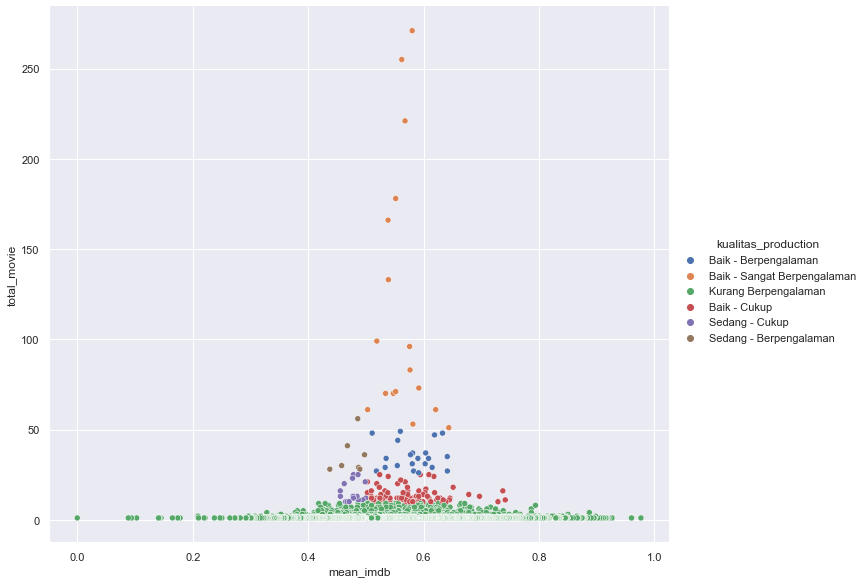

In [180]:
sns.relplot(
    data=pd_list_production_companys,
    x="mean_imdb", y="total_movie", hue="kualitas_production", height=8.27, aspect=9.7/8.27
)


## Mendapatkan Sendiri - Kombinasi Production Film yang bagus

In [181]:
# Sorting DESC data menggunakan acuan IMDB
sorted_via_imdb = movie_full_data_filtered.sort_values('score_via_imdb',ascending=False)
sorted_via_imdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,score_via_imdb,popularity_scaled,score_via_imdb_scaled
1881,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",...,The Shawshank Redemption,8.5,8205,278,The Shawshank Redemption,"[{'cast_id': 3, 'character': 'Andy Dufresne', ...","[{'credit_id': '52fe4231c3a36847f800b153', 'de...",8.459889,0.155175,1.000000
3337,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,"[{'id': 131, 'name': 'italy'}, {'id': 699, 'na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,The Godfather,8.4,5893,238,The Godfather,"[{'cast_id': 5, 'character': 'Don Vito Corleon...","[{'credit_id': '52fe422bc3a36847f80093c9', 'de...",8.346819,0.163078,0.976549


In [182]:
# Bentuk Data Production Movie
sorted_via_imdb.production_companies.head(2).values[1]

[{'name': 'Paramount Pictures', 'id': 4},
 {'name': 'Alfran Productions', 'id': 10211}]

In [183]:
# Mendaftarkan semua production movie , total nilai IMDB dan jumlah movie baik/buruk serta index movie" nya
list_production_companys_combination={}
list_index_data_movie = sorted_via_imdb.index.to_list()
for counter,companies in enumerate(sorted_via_imdb.production_companies):
    if len(companies)==0:
        continue
    elif len(companies)==1:
        if companies[0]['name'] not in list_production_companys_combination:
            if sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]>=0.7:
                list_production_companys_combination[companies[0]['name']]=\
                [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,1,0,[list_index_data_movie[counter]],[],1]
            elif sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]<=0.4:
                list_production_companys_combination[companies[0]['name']]=\
                [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,0,1,[],[],1]
            else:
                list_production_companys_combination[companies[0]['name']]=\
                [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,0,0,[],[],1]
        else:
            if sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]>=0.7:
                list_production_companys_combination[companies[0]['name']]=\
                [list_production_companys_combination[companies[0]['name']][0]+sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],\
                int(list_production_companys_combination[companies[0]['name']][1])+1,int(list_production_companys_combination[companies[0]['name']][2])+1,int(list_production_companys_combination[companies[0]['name']][3]),\
                (list_production_companys_combination[companies[0]['name']][4]),(list_production_companys_combination[companies[0]['name']][5]),(list_production_companys_combination[companies[0]['name']][6])]
                list_production_companys_combination[companies[0]['name']][4].append(list_index_data_movie[counter])
            elif sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]<=0.4:
                list_production_companys_combination[companies[0]['name']]=\
                [list_production_companys_combination[companies[0]['name']][0]+sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],\
                int(list_production_companys_combination[companies[0]['name']][1])+1,int(list_production_companys_combination[companies[0]['name']][2]),int(list_production_companys_combination[companies[0]['name']][3])+1,\
                (list_production_companys_combination[companies[0]['name']][4]),(list_production_companys_combination[companies[0]['name']][5]),(list_production_companys_combination[companies[0]['name']][6])]
                list_production_companys_combination[companies[0]['name']][5].append(list_index_data_movie[counter])
            else:
                list_production_companys_combination[companies[0]['name']]=\
                [list_production_companys_combination[companies[0]['name']][0]+sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],\
                int(list_production_companys_combination[companies[0]['name']][1])+1,int(list_production_companys_combination[companies[0]['name']][2]),int(list_production_companys_combination[companies[0]['name']][3]),\
                (list_production_companys_combination[companies[0]['name']][4]),(list_production_companys_combination[companies[0]['name']][5]),(list_production_companys_combination[companies[0]['name']][6])]
    else:
        len_companies = len(companies)
        # Sorting ulang list of dictionary
        new_companies = sorted(companies, key=lambda d: d['id']) 
        name_of_companies = ""
        for companie_ke,companie in enumerate(new_companies):
            if companie_ke+1 == len_companies:
                name_of_companies += companie['name']
            else:
                name_of_companies += (companie['name']+", ")
            
        if name_of_companies not in list_production_companys_combination:
            if sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]>=0.7:
                list_production_companys_combination[name_of_companies]=\
                [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,1,0,[list_index_data_movie[counter]],[],int(len(companies))]
            elif sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0]<=0.4:
                list_production_companys_combination[name_of_companies]=\
                [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,0,1,[],[],int(len(companies))]
            else:
                list_production_companys_combination[name_of_companies]=\
                [sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],1,0,0,[],[],int(len(companies))]
        else:
            list_production_companys_combination[name_of_companies]=\
            [list_production_companys_combination[name_of_companies][0]+sorted_via_imdb.loc[sorted_via_imdb.index==list_index_data_movie[counter]].score_via_imdb_scaled.values[0],\
            int(list_production_companys_combination[name_of_companies][1])+1,int(list_production_companys_combination[name_of_companies][2]),int(list_production_companys_combination[name_of_companies][3]),\
            (list_production_companys_combination[name_of_companies][4]),(list_production_companys_combination[name_of_companies][5]),(list_production_companys_combination[name_of_companies][6])]

In [184]:
# Transformation dictionary menjadi pandas
pd_list_production_companys_combination = pd.DataFrame.from_dict(list_production_companys_combination, orient='index',columns=['sum_imdb', 'total_movie','total_quality_movie','total_bad_movie','index_quality_movie','index_bad_movie','total_production_movie'])

In [185]:
# Penambahan kolom mean_imdb
pd_list_production_companys_combination['mean_imdb'] = pd_list_production_companys_combination['sum_imdb']/pd_list_production_companys_combination['total_movie']

In [186]:
# Penambahan kolom jenis production
pd_list_production_companys_combination['jenis_production'] = "Sendirian - Kombinasi"

In [187]:
# Didapati 10 production film sendiri/combination dengan total nilai imdb terbaik
pd_list_production_companys_combination.sort_values("sum_imdb" , ascending=False).head(10)

,sum_imdb,total_movie,total_quality_movie,total_bad_movie,index_quality_movie,index_bad_movie,total_production_movie,mean_imdb,jenis_production
Paramount Pictures,22.835507,39,7,0,"[809, 1828, 2946, 2917, 2815, 3931, 867]",[],1,0.585526,Sendirian - Kombinasi
Universal Pictures,14.911544,28,4,3,"[1850, 4076, 3526, 1753]","[1130, 4011, 2003]",1,0.532555,Sendirian - Kombinasi
Columbia Pictures,13.246505,23,4,0,"[818, 2659, 4216, 2184]",[],1,0.575935,Sendirian - Kombinasi
New Line Cinema,12.288985,23,2,4,"[1559, 1581]","[3566, 1238, 1484, 1621]",1,0.534304,Sendirian - Kombinasi
Warner Bros.,10.441925,18,4,3,"[4329, 2328, 1103, 2404]","[1334, 3111, 1035]",1,0.580107,Sendirian - Kombinasi
Walt Disney Pictures,9.824880,18,2,2,"[1695, 4050]","[2559, 2095]",1,0.545827,Sendirian - Kombinasi
"Walt Disney Pictures, Pixar Animation Studios",7.706242,11,1,0,[77],[],2,0.700567,Sendirian - Kombinasi
Touchstone Pictures,7.347140,13,3,1,"[1710, 3023, 2368]",[2766],1,0.565165,Sendirian - Kombinasi
DreamWorks Animation,7.035863,12,1,0,[154],[],1,0.586322,Sendirian - Kombinasi
Twentieth Century Fox Film Corporation,6.252765,11,1,2,[2108],"[966, 376]",1,0.568433,Sendirian - Kombinasi


### Daftar Production Movie Kombinasi yang bagus

In [188]:
# Kombinasi Production Film yang telah memiliki pengalaman bersama
list_production_movie_combination =  pd_list_production_companys_combination.loc[(pd_list_production_companys_combination['total_production_movie']>1) & (pd_list_production_companys_combination['total_movie']>5)].sort_values("mean_imdb" , ascending=False)
list_production_movie_combination

,sum_imdb,total_movie,total_quality_movie,total_bad_movie,index_quality_movie,index_bad_movie,total_production_movie,mean_imdb,jenis_production
"Walt Disney Pictures, Pixar Animation Studios",7.706242,11,1,0,[77],[],2,0.700567,Sendirian - Kombinasi
"Walt Disney Pictures, Walt Disney Feature Animation",6.015291,9,1,0,[494],[],2,0.668366,Sendirian - Kombinasi
"United Artists, Eon Productions, Danjaq",4.172221,7,1,0,[3884],[],3,0.596032,Sendirian - Kombinasi
"Blue Sky Studios, Twentieth Century Fox Animation",4.478696,8,0,0,[],[],2,0.559837,Sendirian - Kombinasi
"Imagine Entertainment, Universal Pictures",3.949329,8,1,0,[635],[],2,0.493666,Sendirian - Kombinasi


<AxesSubplot:xlabel='mean_imdb'>

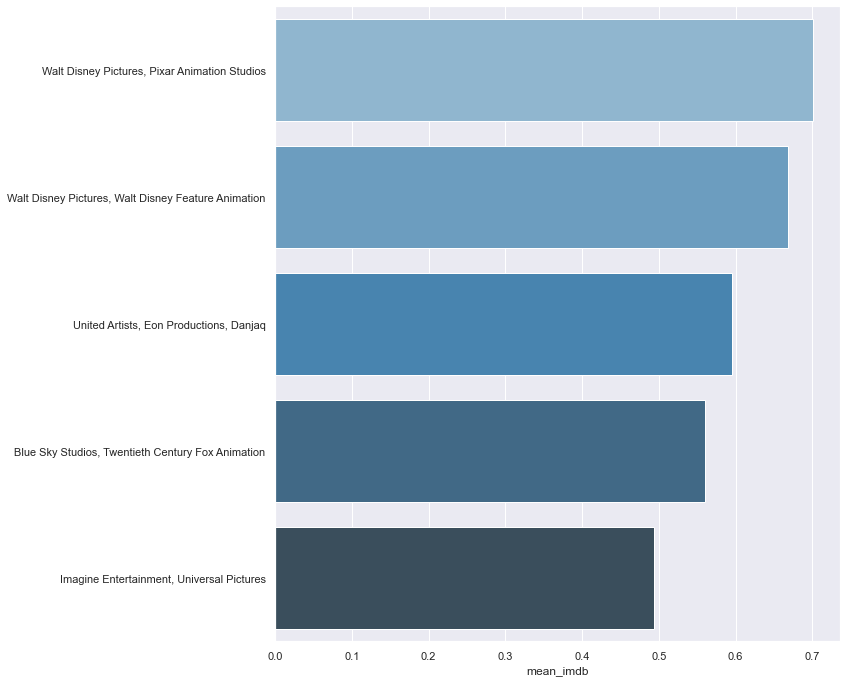

In [189]:
sns.barplot(data = list_production_movie_combination
            , x="mean_imdb",y=list_production_movie_combination.index,palette="Blues_d") 

### Production Film Sendiri dan Kombinasi

<AxesSubplot:xlabel='mean_imdb'>

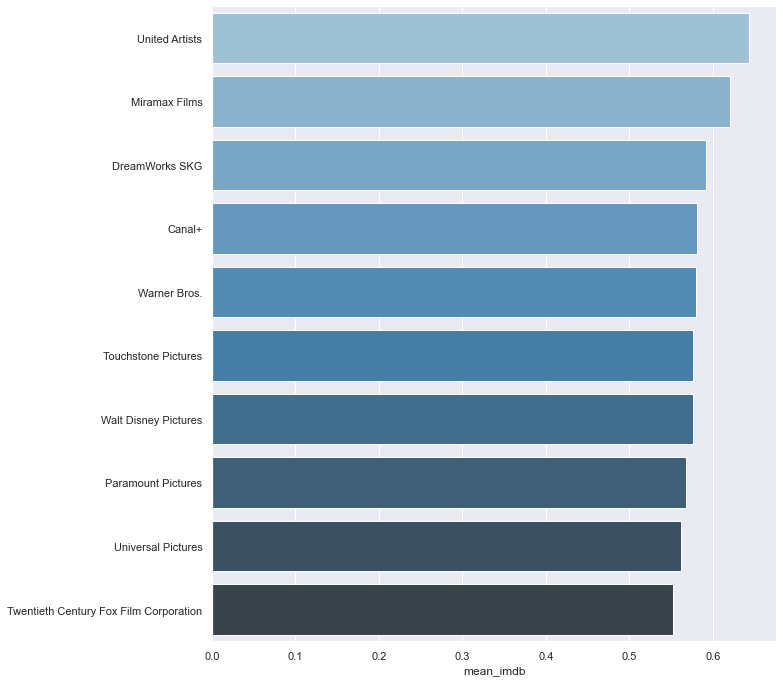

In [190]:
sns.barplot(data = list_top_production_sendiri.head(10)
            , x="mean_imdb",y=list_top_production_sendiri.head(10).index,palette="Blues_d") 


<AxesSubplot:xlabel='mean_imdb'>

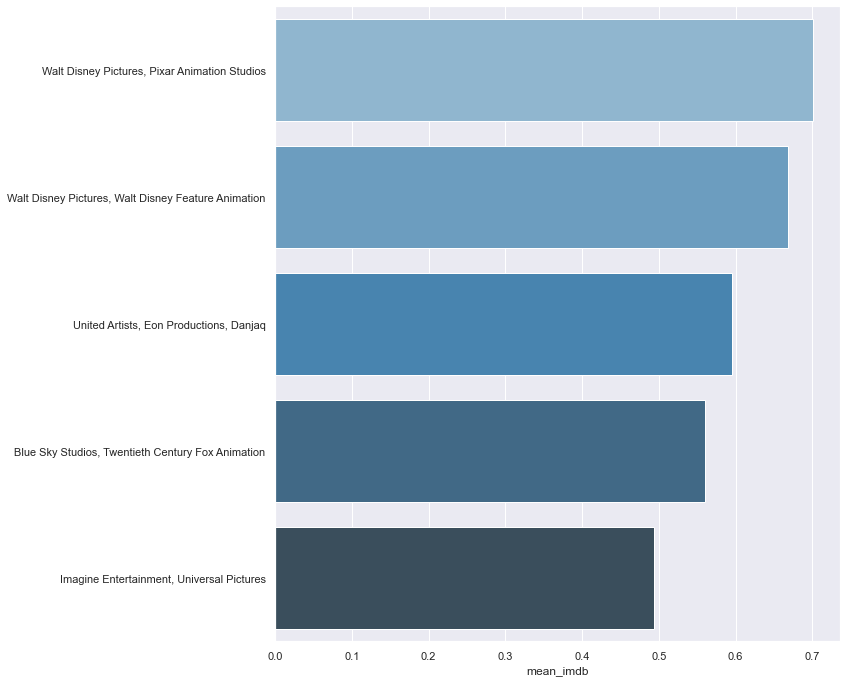

In [191]:
sns.barplot(data = list_production_movie_combination
            , x="mean_imdb",y=list_production_movie_combination.index,palette="Blues_d") 

### Production film sendiri vs kelompok

In [192]:
# Gabungkan dua Data Frame production movie sendiri dan kombinasi untuk divisualisasikan
list_production_sendiri_kombinasi = pd.concat([list_top_production_sendiri, list_production_movie_combination], axis=0)

In [193]:
list_production_sendiri_kombinasi.head(2)

,sum_imdb,total_movie,total_quality_movie,total_bad_movie,index_quality_movie,index_bad_movie,mean_imdb,jenis_production,total_production_movie
United Artists,32.828575,51,4,0,"[3719, 3739, 2344, 4333]",[],0.643698,Sendirian,NaN
Miramax Films,37.878722,61,2,1,"[3232, 2822]",[3595],0.620963,Sendirian,NaN


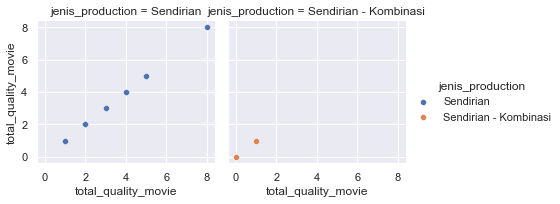

In [194]:
g = sns.FacetGrid(list_production_sendiri_kombinasi, col="jenis_production", hue="jenis_production")
g.map(sns.scatterplot, "total_quality_movie", "total_quality_movie", alpha=1)
g.add_legend()

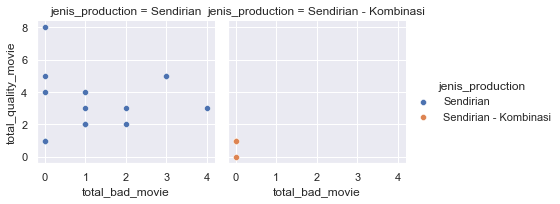

In [195]:
g = sns.FacetGrid(list_production_sendiri_kombinasi, col="jenis_production", hue="jenis_production")
g.map(sns.scatterplot, "total_bad_movie", "total_quality_movie", alpha=1)
g.add_legend()

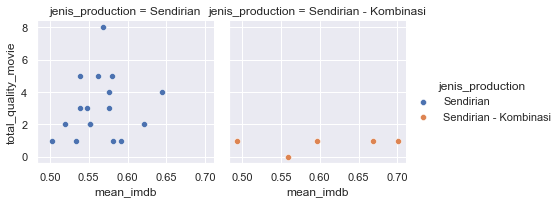

In [196]:
g = sns.FacetGrid(list_production_sendiri_kombinasi, col="jenis_production", hue="jenis_production")
g.map(sns.scatterplot, "mean_imdb", "total_quality_movie", alpha=1)
g.add_legend()

## Setelah mendapatkan data production movie, maka dicari genre film yang bagus

Genre yang bagus dapat diperoleh dari daftar film yang merupakan film dengan kualitas baik. Hal ini bisa didapat dari list index yang disimpan pada setiap produksi film di atas

In [197]:
# Digunakan data production film yang sendirian
data_production_movie = pd_list_production_companys.loc[(pd_list_production_companys['total_movie']>50) & (pd_list_production_companys['mean_imdb']>=0.5)].sort_values("mean_imdb" , ascending=False)

In [198]:
# Mendaftarkan data genre satuan setiap movie yang berkualitas dari data production movie
list_genre={}
for counter,index_movies in enumerate(data_production_movie.index_quality_movie):
    if len(index_movies)==0:
        continue
    elif len(index_movies)>=1:
        # Looping genre
        for index_movie in index_movies:
            nama_genre = sorted_via_imdb.genres.loc[sorted_via_imdb['movie_id']==index_movie]
            for genres in nama_genre:
                for genre in genres:
                    if genre['name'] not in list_genre:
                        list_genre[genre['name']] = [sorted_via_imdb.score_via_imdb_scaled.loc[sorted_via_imdb['movie_id']==index_movie].values[0],1]
                    else:
                        list_genre[genre['name']] = [list_genre[genre['name']][0]+sorted_via_imdb.score_via_imdb_scaled.loc[sorted_via_imdb['movie_id']==index_movie].values[0],list_genre[genre['name']][1]+1]        

In [199]:
# Transformation dictionary menjadi pandas
pd_list_genre = pd.DataFrame.from_dict(list_genre, orient='index',columns=['sum_imdb','total_genre'])

In [200]:
# Penambahan kolom mean_imdb
pd_list_genre['mean_imdb'] = pd_list_genre['sum_imdb']/pd_list_genre['total_genre']

### Daftar genre sendirian dari data film yang berkualitas

In [201]:
# Didapati daftar drama dan nilai imdb nya dari data film yang berkualitas
list_genre_sendiri_kualitas_film = pd_list_genre.sort_values('mean_imdb',ascending=False)
list_genre_sendiri_kualitas_film

,sum_imdb,total_genre,mean_imdb
Mystery,0.911468,1,0.911468
Thriller,2.370324,3,0.790108
Music,0.753978,1,0.753978
Crime,1.386761,2,0.693380
Drama,4.078573,6,0.679762
Romance,2.597692,4,0.649423
Action,0.648820,1,0.648820
Adventure,0.629395,1,0.629395
Animation,0.629395,1,0.629395
Family,0.629395,1,0.629395


<AxesSubplot:xlabel='mean_imdb'>

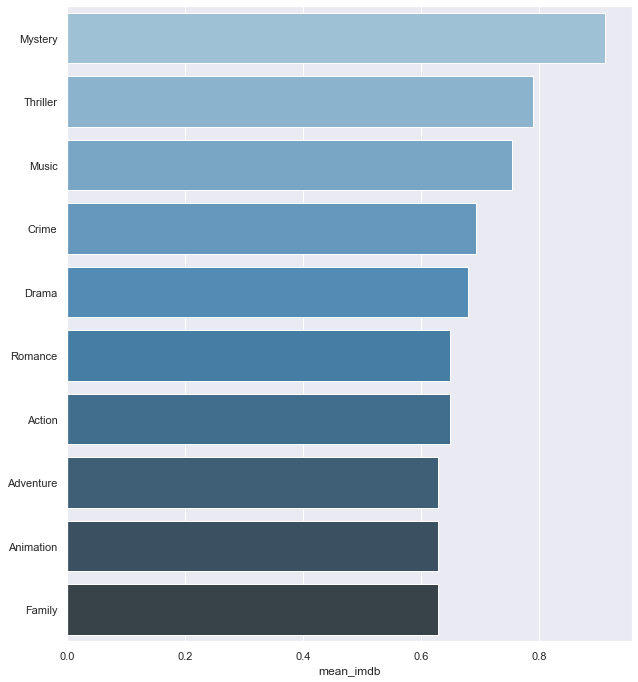

In [223]:
sns.barplot(data = list_genre_sendiri_kualitas_film.head(10)
            , x="mean_imdb",y=list_genre_sendiri_kualitas_film.head(10).index,palette="Blues_d") 

### Mencari genre film yang baik dari semua data film yang ada

In [203]:
# Mendaftarkan data genre satuan setiap movie yang berkualitas dari data production movie
list_genre_semua={}
for counter,nama_genre in enumerate(sorted_via_imdb.genres):
    for genre in nama_genre:
        if genre['name'] not in list_genre_semua:
            list_genre_semua[genre['name']] = [sorted_via_imdb.score_via_imdb_scaled.iloc[counter:counter+1].values[0],1]
        else:
            list_genre_semua[genre['name']] = [list_genre_semua[genre['name']][0]+sorted_via_imdb.score_via_imdb_scaled.iloc[counter:counter+1].values[0],list_genre_semua[genre['name']][1]+1]        

In [204]:
# Transformation dictionary menjadi pandas
pd_list_genre_semua = pd.DataFrame.from_dict(list_genre_semua, orient='index',columns=['sum_imdb','total_genre'])

In [205]:
# Penambahan kolom mean_imdb
pd_list_genre_semua['mean_imdb'] = pd_list_genre_semua['sum_imdb']/pd_list_genre_semua['total_genre']

### Daftar genre sendirian dari semua data movie setelah filterisasi 40%

In [206]:
# Didapati daftar drama dan nilai imdb nya dari semua data film setelah proses filterisasi-1
list_genre_sendirian_filterisasi_1 = pd_list_genre_semua.sort_values('mean_imdb',ascending=False)
list_genre_sendirian_filterisasi_1

,sum_imdb,total_genre,mean_imdb
War,59.116036,90,0.656845
History,70.220465,109,0.644224
Documentary,12.561383,20,0.628069
Western,27.530671,44,0.625697
Drama,759.275218,1230,0.617297
Animation,106.672543,177,0.602670
Music,47.320298,79,0.598991
Crime,285.171988,492,0.579618
Romance,279.552044,485,0.576396
Mystery,148.248530,261,0.568002


<AxesSubplot:xlabel='mean_imdb'>

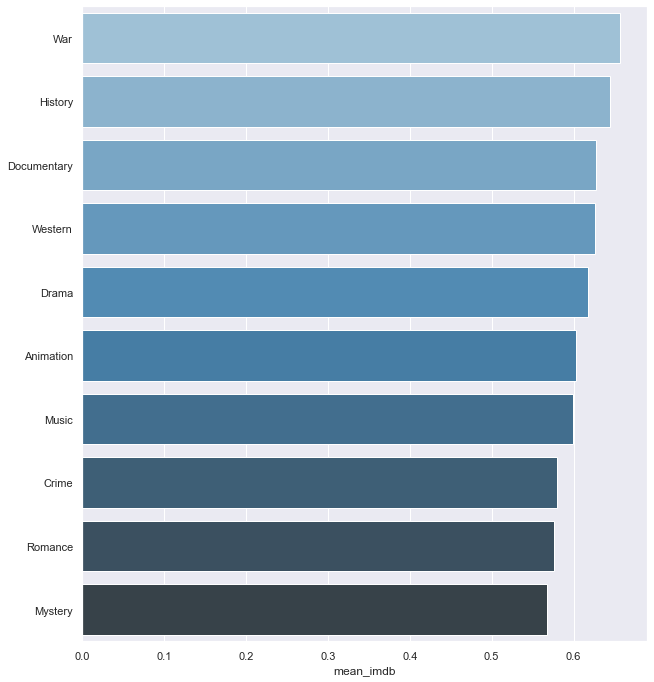

In [222]:
sns.barplot(data = list_genre_sendirian_filterisasi_1.head(10)
            , x="mean_imdb",y=list_genre_sendirian_filterisasi_1.head(10).index,palette="Blues_d") 

### Mencari kombinasi genre yang bagus dari data production movie yang berkualitas

In [208]:
# [TANPA SORTING ID GENRE] Mendaftarkan data genre kombinasi setiap movie yang berkualitas dari data production movie
list_genre_combination={}
for counter,index_movies in enumerate(data_production_movie.index_quality_movie):
    if len(index_movies)==0:
        continue
    elif len(index_movies)>=1:
        # Looping genre
        for index_movie in index_movies:
            nama_genre = sorted_via_imdb.genres.loc[sorted_via_imdb['movie_id']==index_movie]
            len_genre = 0
            if len(nama_genre.values) != 0:
                len_genre = (len(list(nama_genre.values)[0]))
            if len_genre>1:
                nama_genre_kombinasi=""
                for genres in nama_genre:
                    for counter_ke,genre in enumerate(genres):
                        if counter_ke+1 == len_genre:
                            nama_genre_kombinasi += genre['name']
                        else:
                            nama_genre_kombinasi += (genre['name']+", ")
                    if nama_genre_kombinasi not in list_genre_combination:
                        list_genre_combination[nama_genre_kombinasi] = [sorted_via_imdb.score_via_imdb_scaled.loc[sorted_via_imdb['movie_id']==index_movie].values[0],1]
                    else:
                        list_genre_combination[nama_genre_kombinasi] = [list_genre_combination[nama_genre_kombinasi][0]+sorted_via_imdb.score_via_imdb_scaled.loc[sorted_via_imdb['movie_id']==index_movie].values[0],list_genre_combination[nama_genre_kombinasi][1]+1]
            else:
                # Looping genre
                for genres in nama_genre:
                    for genre in genres:
                        if genre['name'] not in list_genre_combination:
                            list_genre_combination[genre['name']] = [sorted_via_imdb.score_via_imdb_scaled.loc[sorted_via_imdb['movie_id']==index_movie].values[0],1]
                        else:
                            list_genre_combination[genre['name']] = [list_genre_combination[genre['name']][0]+sorted_via_imdb.score_via_imdb_scaled.loc[sorted_via_imdb['movie_id']==index_movie].values[0],list_genre_combination[genre['name']][1]+1]        
                

In [209]:
# [DENGAN SORTING ID GENRE] Mendaftarkan data genre kombinasi setiap movie yang berkualitas dari data production movie
list_genre_combination={}
for counter,index_movies in enumerate(data_production_movie.index_quality_movie):
    if len(index_movies)==0:
        continue
    elif len(index_movies)>=1:
        # Looping genre
        for index_movie in index_movies:
            nama_genre = sorted_via_imdb.genres.loc[sorted_via_imdb['movie_id']==index_movie]
            len_genre = 0
            if len(nama_genre.values) != 0:
                len_genre = (len(list(nama_genre.values)[0]))
            if len_genre>1:
                nama_genre_kombinasi=""
                for genres in nama_genre:
                    # Sorting ulang list of dictionary
                    nama_genre_new = sorted(genres, key=lambda d: d['id']) 
                    for counter_ke,genre in enumerate(nama_genre_new):
                        if counter_ke+1 == len_genre:
                            nama_genre_kombinasi += genre['name']
                        else:
                            nama_genre_kombinasi += (genre['name']+", ")
                    if nama_genre_kombinasi not in list_genre_combination:
                        list_genre_combination[nama_genre_kombinasi] = [sorted_via_imdb.score_via_imdb_scaled.loc[sorted_via_imdb['movie_id']==index_movie].values[0],1]
                    else:
                        list_genre_combination[nama_genre_kombinasi] = [list_genre_combination[nama_genre_kombinasi][0]+sorted_via_imdb.score_via_imdb_scaled.loc[sorted_via_imdb['movie_id']==index_movie].values[0],list_genre_combination[nama_genre_kombinasi][1]+1]
            else:
                # Looping genre
                for genres in nama_genre:
                    for genre in genres:
                        if genre['name'] not in list_genre_combination:
                            list_genre_combination[genre['name']] = [sorted_via_imdb.score_via_imdb_scaled.loc[sorted_via_imdb['movie_id']==index_movie].values[0],1]
                        else:
                            list_genre_combination[genre['name']] = [list_genre_combination[genre['name']][0]+sorted_via_imdb.score_via_imdb_scaled.loc[sorted_via_imdb['movie_id']==index_movie].values[0],list_genre_combination[genre['name']][1]+1]        
                

In [210]:
# Transformation dictionary menjadi pandas
pd_list_genre_combination_quality = pd.DataFrame.from_dict(list_genre_combination, orient='index',columns=['sum_imdb','total_genre_combination'])

In [211]:
# Penambahan kolom mean_imdb
pd_list_genre_combination_quality['mean_imdb'] = pd_list_genre_combination_quality['sum_imdb']/pd_list_genre_combination_quality['total_genre_combination']

### Daftar genre movie kombinasi dari data film kualitas 

In [212]:
# Didapati daftar genre kombinasi dari data film berkualitas
list_genre_kombinasi_quality = pd_list_genre_combination_quality.sort_values('mean_imdb',ascending=False)

<AxesSubplot:xlabel='mean_imdb'>

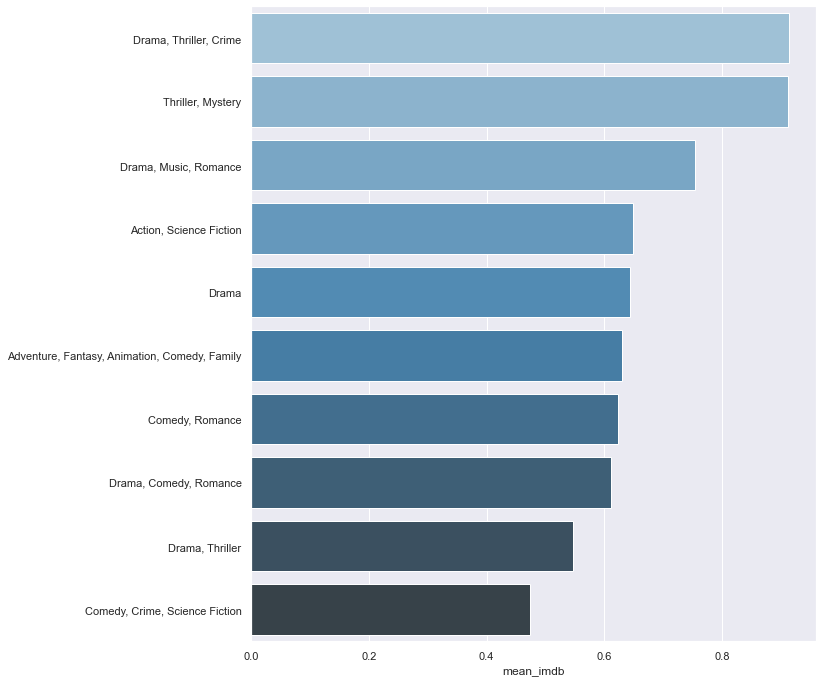

In [224]:
sns.barplot(data = list_genre_kombinasi_quality.head(10)
            , x="mean_imdb",y=list_genre_kombinasi_quality.head(10).index,palette="Blues_d") 

### Mencari Genre Kombinasi dari semua data film

In [214]:
# Mendaftarkan data genre kombonasi semua movie 
list_genre_combination_semua={}
for counter,nama_genre in enumerate(sorted_via_imdb.genres):
    len_genre = 0
    if len(nama_genre) != 0:
        len_genre = (len(list(nama_genre)))
    if len_genre>1:
        # Sorting ulang list of dictionary
        nama_genre_new = sorted(nama_genre, key=lambda d: d['id']) 
        nama_genre_kombinasi=""
        for counter_ke,genre in enumerate(nama_genre_new):
            if counter_ke+1 == len_genre:
                nama_genre_kombinasi += genre['name']
            else:
                nama_genre_kombinasi += (genre['name']+", ")
        if nama_genre_kombinasi not in list_genre_combination_semua:
            list_genre_combination_semua[nama_genre_kombinasi] = [sorted_via_imdb.score_via_imdb_scaled.iloc[counter:counter+1].values[0],1]
        else:
            list_genre_combination_semua[nama_genre_kombinasi] = [list_genre_combination_semua[nama_genre_kombinasi][0]+sorted_via_imdb.score_via_imdb_scaled.iloc[counter:counter+1].values[0],list_genre_combination_semua[nama_genre_kombinasi][1]+1]
    else:
        # Looping genre
        for genre in nama_genre:
            if genre['name'] not in list_genre_combination_semua:
                list_genre_combination_semua[genre['name']] = [sorted_via_imdb.score_via_imdb_scaled.iloc[counter:counter+1].values[0],1]
            else:
                list_genre_combination_semua[genre['name']] = [list_genre_combination_semua[genre['name']][0]+sorted_via_imdb.score_via_imdb_scaled.iloc[counter:counter+1].values[0],list_genre_combination_semua[genre['name']][1]+1]
                
       

In [215]:
# Transformation dictionary menjadi pandas
pd_list_genre_combination_semua = pd.DataFrame.from_dict(list_genre_combination_semua, orient='index',columns=['sum_imdb','total_genre_combination'])

In [216]:
# Penambahan kolom mean_imdb
pd_list_genre_combination_semua['mean_imdb'] = pd_list_genre_combination_semua['sum_imdb']/pd_list_genre_combination_semua['total_genre_combination']

### Daftar genre kombinasi dari data film filter 40%

In [217]:
# Didapati kombinasi genre terbaik dari semua data film yang difilter-1
list_genre_kombinasi_semua_data = pd_list_genre_combination_semua.loc[pd_list_genre_combination_semua['total_genre_combination']>5].sort_values('mean_imdb',ascending=False).head(15)
list_genre_kombinasi_semua_data

,sum_imdb,total_genre_combination,mean_imdb
Western,7.345232,10,0.734523
"Drama, History, War",8.014244,11,0.728568
"Drama, Crime",28.158154,39,0.722004
"Drama, Science Fiction",7.871398,11,0.715582
"Drama, War",7.744753,11,0.704068
"Drama, Action",6.084874,9,0.676097
"Adventure, Drama, Science Fiction",4.029419,6,0.671570
Drama,105.942465,160,0.662140
Documentary,5.948561,9,0.660951
"Drama, History",18.285896,28,0.653068


<AxesSubplot:xlabel='mean_imdb'>

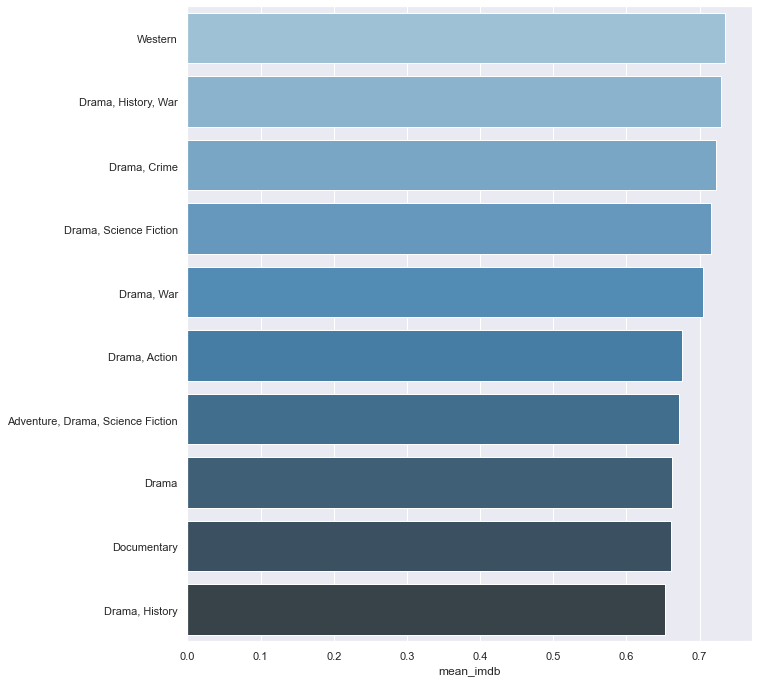

In [225]:
sns.barplot(data = list_genre_kombinasi_semua_data.head(10)
            , x="mean_imdb",y=list_genre_kombinasi_semua_data.head(10).index,palette="Blues_d") 

# Kesimpulan

1. Vote_Avarage dan Score IMDB memiliki hasil yang mirip.
2. Popularitas menjadi tolak ukur kualitas film yang kurang tepat untuk digunakan.
2. Filterisasi dengan 40th persentil memberikan hasil analisa yang lebih baik.
3. Production film "sendiri" lebih sering menghasilkan film yang berkualitas.
4. Production film "kombinasi" lebih sedikit menghasilkan film yang buruk.
5. Production film "sendiri" belum pernah mendapatkan mean_imdb diatas 0.65, sedangkan production_film "kombinasi" pernah
6. Rule based manual yang dibuat untuk klasifikasi kualitas production film menghasilkan klasifikasi yang baik.
7. Terdapat 10 film yang memiliki kualitas baik, yaitu: The Shawshank Redemption, The Godfather, Fight Club, Plup Fiction, Schindler's List, Whiplash, 千と千尋の神隠し, dst
8. Terdapat 10 Production Movie Sendiri yang berkualitas, yaitu : United Artists, Miramax Films, DreamWorks SKG, Canal +, Wanner Bros, Touchstone Pictures, Walt Disney Pictures, Paramount Pictures, Universal Pictures, Twentieth Century Fox Film Corporation.
9. Terdapat 5 Production Movie Kombinasi yang berkualitas, yaitu : (Walt Disney Pictures, Pixar Animation Studios) , (Walt Disney Pictures, Walt Disney Feature Animation), ( United Artist, Eon Productions, Danjaq), ( Blue Sky Studios, Twentieth Century Fox Animation), (Imagine Entertainment, Universal Pictures).
10. Top 5 Production Movie "Kombinasi" secara mayoritas masih berasal dari top 10 production movie.
11. Dari Data "Production Film yang berkualitas", terdapat 10 genre yang paling populer, yaitu Mysteri, Thriler, Music, Crime, Drama, Romance, Action, Advanture, Animation, Family
12. Dari data "Semua film yang telah difilter" terdapat 10 genre yang paling populer, yaitu War, History, Documentary, Western, Drama, Animation, Music, Crime, Romance, Mysteri.
13. Dari hasil point 11 dan 12, diketahui masih ada beberapa genre yang saling ditemukan dikedua hasil tersebut. Sehingga hasil point 11 dan 12 kurang lebih mirip.
14. Dari data "Production Film berkualitas" diketahui terdapat 10 kombinasi genre yang paling baik, yaitu (Drama, Thriler, Crime), (Thriler, Mystery), (Drama, Music, Romance), (Action, Science Fiction), (Drama), (Advanture, Fantasy, Animation, Comedy, Family), (Comdey, Romance), (Drama, Comedy, Romance).
15. Dari data "Semua film yang telah difilter", yaitu Western, (Drama, Hystory, War), (Drama, Crime), (Drama, Science Fiction), (Drama, War), (Drama, Action), (Advanture,Drama,Science Fiction), Drama

Nb : Pada point 15, dihasilkan "Western" dan "Drama". Hasil tersebut dipertahankan agar menunjukan "Western" dan "Drama" bahkan masih menjadi top 10 pada kondisi data yang telah dibuat ke dalam "Genre yang kombinasi"